# Part II - Data exploratory of Prosper Loans After July 2009
## by Akorede Ridwanullahi Abiodun

## Investigation Overview
In this investigation, I wanted to look at the details of the people that applied for Prospers loans from July 2009.


## Dataset Overview
The original data contain 113937 loans which entail 81 variables on each loan. The data was filtered down to contain only loans applied after July 2009 and some unused variables were dropped while the variables were reduced to 19.


In [33]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [34]:
# load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv('prosperLoanData.csv')

In [35]:
#removing of unused variables
prosper_loan=prosper_loan.drop(columns=[
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio',  'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
       'Investors'])

In [36]:
#renaming of variables
def column_rename(dataframe,old_name,new_name):
    """renaming of variable using rename function"""
    return dataframe.rename(columns = {old_name : new_name},inplace=True)

column_rename(prosper_loan,'ProsperRating (numeric)', 'ProsperRatingNumeric')
column_rename(prosper_loan,'ProsperRating (Alpha)', 'ProsperRatingAlpha')
column_rename(prosper_loan,'ListingCategory (numeric)', 'ListingCategoryNumeric')

In [37]:
#filtering out loans before July 2009 and non values in loans beyond 2009
prosper_loan_2009_above=prosper_loan[prosper_loan.ProsperRatingNumeric.notna()]
prosper_loan_2009_below=prosper_loan[prosper_loan.CreditGrade.notna()]

In [38]:

#transformation of Term values
prosper_loan_2009_above = prosper_loan_2009_above.replace({'Term': {12 : '12-Short Term', 36:'36-Mid Term', 60: '60-Long Term'}})

#convert ProsperRatingNumeric, ProsperScore, ProsperRatingAlpha and term to categorical types
ordinal_value = {'ProsperRatingNumeric': [1.0,2.0,3.0,4.0,5.0,6.0,7.0], 
                  'ProsperScore' :[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0],
                 'ProsperRatingAlpha' : ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], 
                 'Term' : ['12-Short Term', '36-Mid Term', '60-Long Term']}
for var in ordinal_value:
    ordered_value = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_value[var])
    prosper_loan_2009_above[var] = prosper_loan_2009_above[var].astype(ordered_value)

The Data wrangling was carried out on the dataset, by filtering loans applied before July 2009, dropping empty rows, and changing some variables data type to more appropriate data type

## Distribution of Borrower Annual Percentage Rate

The prosper borrower annual percentage rate in the dataset has a significant rise at 0.36, while there is a very large range of values from 0.11 as the lowest to 0.35 as the highest followed by a signifcant rise at 0.36, the distribution of borrower annual percentage rate takes on a multimodal shape.

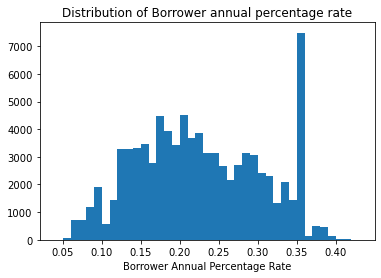

In [39]:
bin_size =np.arange(0.04, prosper_loan_2009_above.BorrowerAPR.max()+0.01,0.01)
plt.hist(data = prosper_loan_2009_above, x = 'BorrowerAPR',bins = bin_size);
plt.xlabel('Borrower Annual Percentage Rate')
plt.title('Distribution of Borrower annual percentage rate')
plt.show()

## DIstribution of Borrower Interest Rate
The prosper borrower interest rate in the dataset take on a very range of values from 0.04 which is the lowest to 0.35. Within there is a significant rise at 0.32 which has the distribution, the distribution of borrower interest rate takes on a multimodal shape.

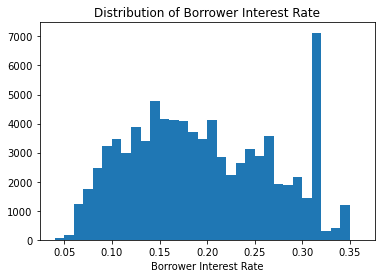

In [40]:
bin_size= np.arange(0.04, prosper_loan_2009_above.BorrowerRate.max()+0.01,0.01)
plt.hist(data = prosper_loan_2009_above, x = 'BorrowerRate', bins=bin_size);
plt.xlabel('Borrower Interest Rate')
plt.title('Distribution of Borrower Interest Rate')
plt.show()

In [41]:
#combining all past due values in LoanStatus to a single value
prosper_loan_2009_above= prosper_loan_2009_above.replace({'LoanStatus' : {'Past Due (1-15 days)' : 'Past Due', 'Past Due (16-30 days)': 'Past Due', 'Past Due (31-60 days)': 'Past Due', 
                                                          'Past Due (61-90 days)': 'Past Due', 'Past Due (91-120 days)': 'Past Due',
                                                          'Past Due (>120 days)': 'Past Due'}})
prosper_loan_2009_above.LoanStatus.unique()
base_color = sb.color_palette()[2]

The loan status contained several values that are past due, therefore all these values were replaced with a common statement 'Past due' so that to have a well-explained plot

## State of the Loan Status

With the outcome of the plot, it has vividly shown that most of the loan statuses are current while final payment progress maintains the least 

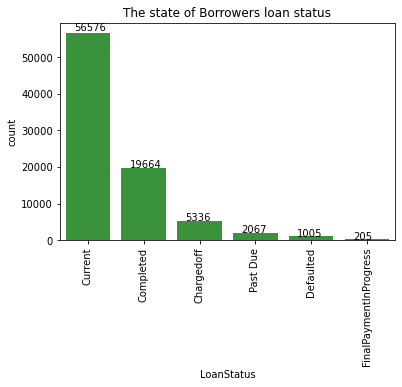

In [42]:
#plotting loan status
loan_status= prosper_loan_2009_above['LoanStatus'].value_counts().index
ax =sb.countplot(data = prosper_loan_2009_above, x='LoanStatus', color = base_color, order=loan_status);
plt.title('The state of Borrowers loan status')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.15,p.get_height()*1.01))

## Borrowers by State

One of the criteria of the application is to track the borrowers using their information, and it appears that the bulk of borrowers reside in California (CA), with Wyoming having the lowest number.

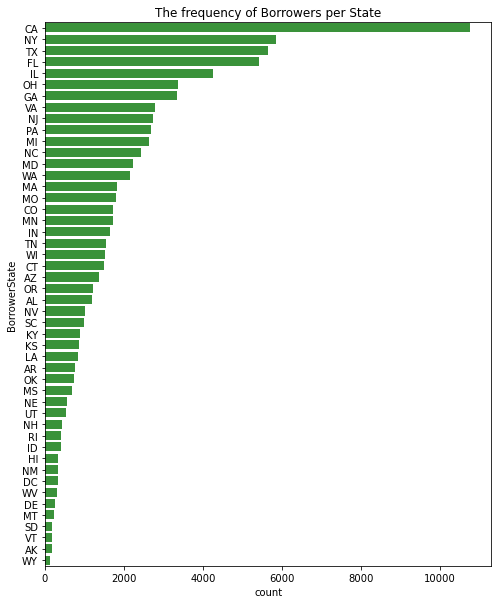

In [43]:
plt.rcParams["figure.figsize"] = (8,10)
state_count = prosper_loan_2009_above['BorrowerState'].value_counts().index
sb.countplot(data = prosper_loan_2009_above, y='BorrowerState', color = base_color, order=state_count);
plt.title('The frequency of Borrowers per State');

In [44]:
prosper_loan_2009_above = prosper_loan_2009_above.replace({'ListingCategoryNumeric': { 0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 
                                                                                      4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat',
                                                                                      10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 
                                                                                      14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 
                                                                                      19 : 'Vacation', 20 : 'Wedding Loans'}})

ListingCategoryNumeric variable values in the dataset are number which was changed with the actual words to have a well-explained plot

## Borrower by Listing Category

It has been demonstrated with a plot that the majority of applicants for loans cited debt consolidation as their rationale, whilst the least number of applicants cited not availabe as their reason.

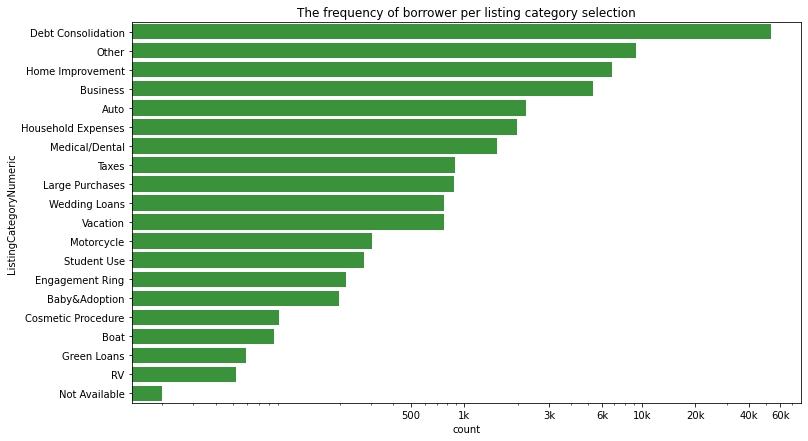

In [45]:
#plot for tge number of borrower per listingcategorynumeric
plt.rcParams["figure.figsize"] = (12,7)
order_category = prosper_loan_2009_above.ListingCategoryNumeric.value_counts().index
sb.countplot(data=prosper_loan_2009_above, y='ListingCategoryNumeric', color = base_color,order=order_category);
plt.title('The frequency of borrower per listing category selection');
plt.xscale('log')
plt.xticks([500, 1e3, 3e3,6e3,10e3,20e3,40e3,60e3],['500','1k','3k','6k','10k','20k','40k','60k']);

In [47]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
prosper_loan_2009_above['EmploymentStatusMerge'] = prosper_loan_2009_above.EmploymentStatus
prosper_loan_2009_above= prosper_loan_2009_above.replace({'EmploymentStatusMerge': {'Retired' : 'Not employed', 
                                                                                    'Full-time' : 'Employed', 'Part-time' : 'Employed'}})

## Borrower Employment status

It has been demonstrated with a plot that the majority of applicants for loans are employed , whilst the least number of applicants cited are not employed.

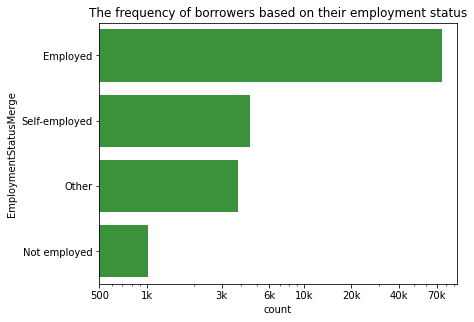

In [48]:
employment_status= prosper_loan_2009_above['EmploymentStatusMerge'].value_counts().index
sb.countplot(data = prosper_loan_2009_above, y='EmploymentStatusMerge', color = base_color, order=employment_status);
plt.title('The frequency of borrowers based on their employment status');
plt.xscale('log')
plt.xticks([500, 1e3, 3e3,6e3,10e3,20e3,40e3,70e3],['500','1k','3k','6k','10k','20k','40k','70k']);

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [49]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 702281 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\USER\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 